In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Plot function using ROOT

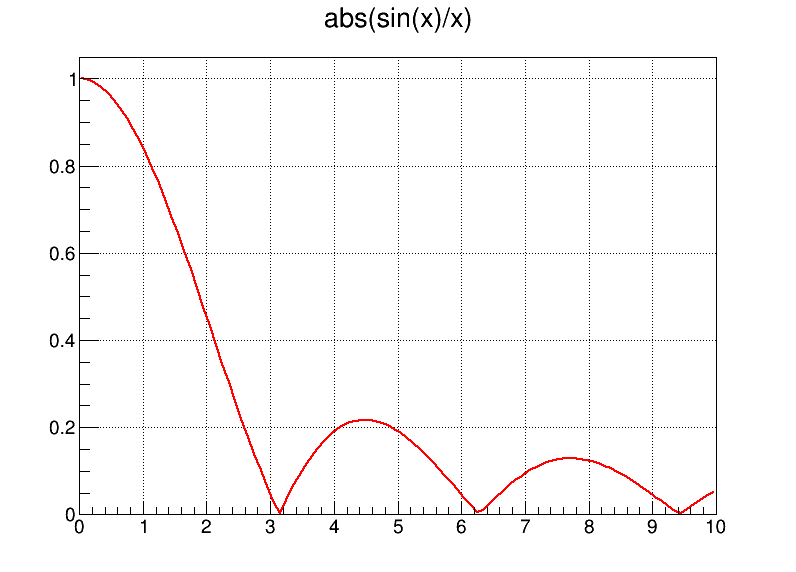

In [2]:
import ROOT
from rep.plotting import default_canvas
c1 = default_canvas()
fun1 = ROOT.TF1( 'fun1', 'abs(sin(x)/x)', 0, 10)
c1.SetGridx()
c1.SetGridy()
fun1.Draw()
c1

# Plot histogram using ROOT for branch in root file

In [3]:
F = ROOT.TFile("toy_datasets/toyMC_bck_mass.root")

In [4]:
T = F.Get("Tau23Mu")

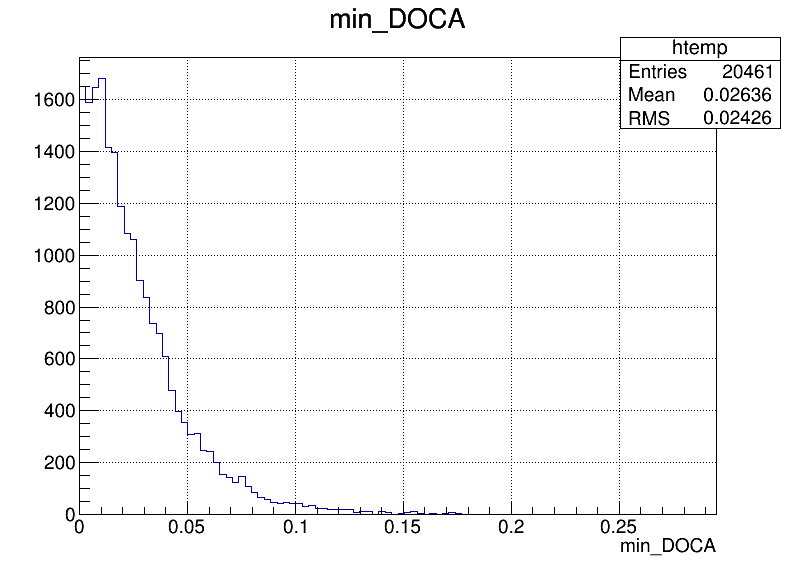

In [5]:
T.Draw("min_DOCA")
c1

## use histogram settings

In [6]:
h1 = ROOT.TH1F("h1","hist from tree",50, -0.25, 0.25)

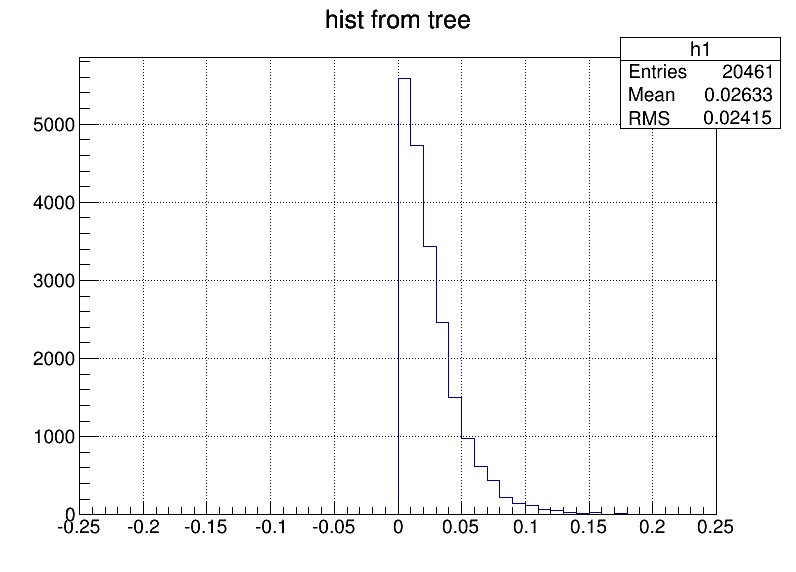

In [7]:
T.Draw("min_DOCA>>h1")
c1

# root_numpy way

There are two comfortable libraries to read and work with root files

* root_numpy http://rootpy.github.io/root_numpy/
* rootpy http://www.rootpy.org

In [8]:
import root_numpy
# read root data to numpy.array
data = root_numpy.root2array("toy_datasets/toyMC_bck_mass.root", 'Tau23Mu', branches=['min_DOCA', 'mass'])

In [9]:
import numpy
data2 = numpy.array(data[:10], dtype=[('1', numpy.float32), ('2', numpy.float32)])

### convert to pandas

In [10]:
import pandas
pandas.DataFrame(data)

,min_DOCA,mass
0,0.015175,1628.509784
1,0.000997,1679.370983
2,0.016812,2128.668736
3,0.006014,2089.925634
4,0.004157,1610.112183
5,0.056992,1397.421265
6,0.029978,1613.646622
7,0.050269,1918.156982
8,0.082375,1497.562059
9,0.037431,1914.717285


### Histograms 

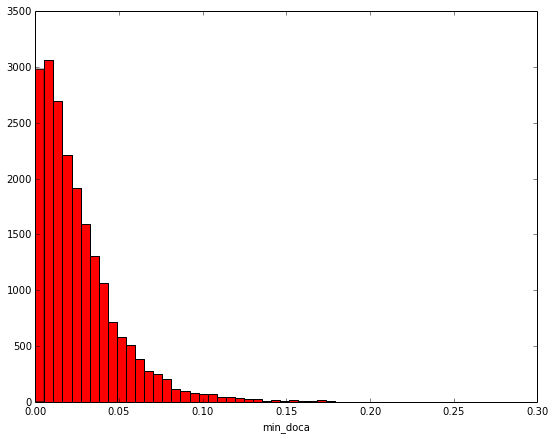

In [11]:
figure(figsize=(9, 7))
hist(data['min_DOCA'], bins=50)
xlabel('min_doca')

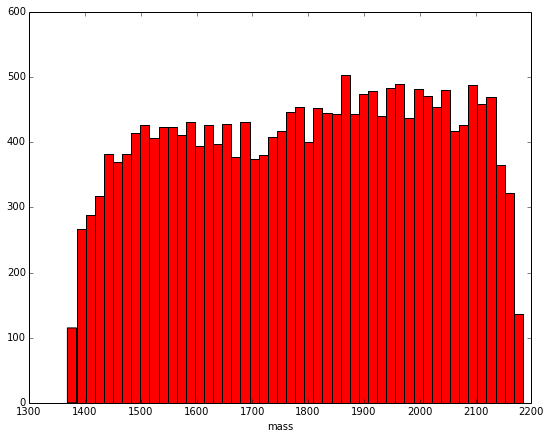

In [12]:
figure(figsize=(9, 7))
hist(data['mass'], bins=50)
xlabel('mass')

### Read data using some preselections

In [13]:
data = root_numpy.root2array("toy_datasets/toyMC_bck_mass.root", 'Tau23Mu', branches=['mass'], selection='mass > 1700')

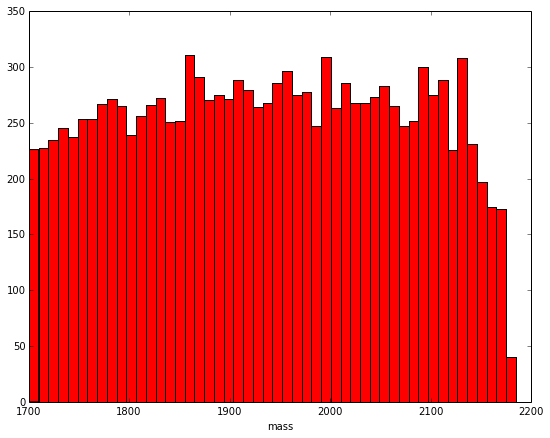

In [14]:
figure(figsize=(9, 7))
hist(data['mass'], bins=50)
xlabel('mass')